### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

c:\users\ranjeet walia\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\ranjeet walia\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\ranjeet walia\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


### Data Collection

In [2]:
Confirmed = pd.read_csv('time_series-ncov-Confirmed.csv')
Confirmed_df = pd.DataFrame(Confirmed)
Confirmed_df = Confirmed_df.drop(Confirmed_df.index[0])
Confirmed_df = Confirmed_df.astype({'Value':float}) 
Confirmed_df.shape

(31062, 6)

In [3]:
Confirmed_df.dtypes

Province/State     object
Country/Region     object
Lat                object
Long               object
Date               object
Value             float64
dtype: object

In [4]:
Confirmed_df.head()

,Province/State,Country/Region,Lat,Long,Date,Value
1,NaN,Afghanistan,33.0,65.0,2020-03-23,40.0
2,NaN,Afghanistan,33.0,65.0,2020-03-22,40.0
3,NaN,Afghanistan,33.0,65.0,2020-03-21,24.0
4,NaN,Afghanistan,33.0,65.0,2020-03-20,24.0
5,NaN,Afghanistan,33.0,65.0,2020-03-19,22.0


In [5]:
Deaths = pd.read_csv('time_series-ncov-Deaths.csv')
Deaths_df = pd.DataFrame(Deaths)
Deaths_df = Deaths_df.drop(Deaths_df.index[0])
Deaths_df = Deaths_df.astype({'Value':float}) 
Deaths_df.shape

(31062, 6)

In [6]:
Deaths_df.head()

,Province/State,Country/Region,Lat,Long,Date,Value
1,NaN,Afghanistan,33.0,65.0,2020-03-23,1.0
2,NaN,Afghanistan,33.0,65.0,2020-03-22,1.0
3,NaN,Afghanistan,33.0,65.0,2020-03-21,0.0
4,NaN,Afghanistan,33.0,65.0,2020-03-20,0.0
5,NaN,Afghanistan,33.0,65.0,2020-03-19,0.0


In [7]:
Recovered = pd.read_csv('time_series-ncov-Recovered.csv')
Recovered_df = pd.DataFrame(Recovered)
Recovered_df = Recovered_df.drop(Recovered_df.index[0])
Recovered_df = Recovered_df.astype({'Value':float}) 
Recovered_df.shape

(31062, 6)

In [8]:
Recovered_df.head()

,Province/State,Country/Region,Lat,Long,Date,Value
1,NaN,Afghanistan,33.0,65.0,2020-03-23,1.0
2,NaN,Afghanistan,33.0,65.0,2020-03-22,1.0
3,NaN,Afghanistan,33.0,65.0,2020-03-21,1.0
4,NaN,Afghanistan,33.0,65.0,2020-03-20,1.0
5,NaN,Afghanistan,33.0,65.0,2020-03-19,1.0


### Data Preprocessing

##### Removing unused Columns

In [9]:
Confirmed_df.rename({'Value':'Confirmed_Cases'},axis=1,inplace=True)
Confirmed_df = Confirmed_df.drop(["Lat", "Long"], axis = 1)
Confirmed_df.head()

,Province/State,Country/Region,Date,Confirmed_Cases
1,NaN,Afghanistan,2020-03-23,40.0
2,NaN,Afghanistan,2020-03-22,40.0
3,NaN,Afghanistan,2020-03-21,24.0
4,NaN,Afghanistan,2020-03-20,24.0
5,NaN,Afghanistan,2020-03-19,22.0


In [10]:
Deaths_df.rename({'Value':'Deaths'},axis=1,inplace=True)
Deaths_df = Deaths_df.drop(["Lat", "Long"], axis = 1)
print(Deaths_df.head())

  Province/State Country/Region        Date  Deaths
1            NaN    Afghanistan  2020-03-23     1.0
2            NaN    Afghanistan  2020-03-22     1.0
3            NaN    Afghanistan  2020-03-21     0.0
4            NaN    Afghanistan  2020-03-20     0.0
5            NaN    Afghanistan  2020-03-19     0.0


In [11]:
Recovered_df.rename({'Value':'Recovered'},axis=1,inplace=True)
Recovered_df = Recovered_df.drop(["Lat", "Long"], axis = 1)
print(Recovered_df.head())

  Province/State Country/Region        Date  Recovered
1            NaN    Afghanistan  2020-03-23        1.0
2            NaN    Afghanistan  2020-03-22        1.0
3            NaN    Afghanistan  2020-03-21        1.0
4            NaN    Afghanistan  2020-03-20        1.0
5            NaN    Afghanistan  2020-03-19        1.0


##### Combining into Single CSV file

In [12]:
Confirmed_df = Confirmed_df.sort_values(['Country/Region','Date'], ascending=True).drop('Province/State', axis=1)
Confirmed_df = Confirmed_df.groupby(['Country/Region','Date']).sum()
print(Confirmed_df.head())

                           Confirmed_Cases
Country/Region Date                       
Afghanistan    2020-01-22              0.0
               2020-01-23              0.0
               2020-01-24              0.0
               2020-01-25              0.0
               2020-01-26              0.0


In [13]:
Deaths_df = Deaths_df.sort_values(['Country/Region','Date'], ascending=True).drop('Province/State', axis=1)
Deaths_df = Deaths_df.groupby(['Country/Region','Date']).sum()
print(Deaths_df.head())

                           Deaths
Country/Region Date              
Afghanistan    2020-01-22     0.0
               2020-01-23     0.0
               2020-01-24     0.0
               2020-01-25     0.0
               2020-01-26     0.0


In [14]:
Recovered_df = Recovered_df.sort_values(['Country/Region','Date'], ascending=True).drop('Province/State', axis=1)
Recovered_df = Recovered_df.groupby(['Country/Region','Date']).sum()
print(Recovered_df.head())

                           Recovered
Country/Region Date                 
Afghanistan    2020-01-22        0.0
               2020-01-23        0.0
               2020-01-24        0.0
               2020-01-25        0.0
               2020-01-26        0.0


In [15]:
Combined_df = Confirmed_df.merge(Deaths_df, left_index=True, right_on=['Country/Region','Date'])
Combined_df = Combined_df.merge(Recovered_df, left_index=True, right_on=['Country/Region','Date'])
Combined_df = Combined_df.reset_index(level=['Country/Region','Date'])

##### Data Saved

In [16]:
Combined_df.to_csv('Final_data.csv')

### Data Visualization

In [17]:
Effected_Countries = set(Combined_df['Country/Region'].to_list())
print(len(Effected_Countries))

183


In [18]:
print(Effected_Countries)

{'Tunisia', 'Monaco', 'Martinique', 'India', 'French Guiana', 'Reunion', 'Venezuela', 'El Salvador', 'Angola', 'Guatemala', 'Dominica', 'Sri Lanka', 'Portugal', 'Bolivia', 'Congo (Brazzaville)', 'Albania', 'Uruguay', 'Afghanistan', 'Puerto Rico', 'Cambodia', 'Zambia', 'Iceland', 'Uzbekistan', 'Switzerland', 'Jordan', 'United Kingdom', 'Japan', 'Australia', 'Austria', 'Singapore', 'Slovakia', 'Cabo Verde', 'Sudan', 'Cameroon', 'Kenya', 'Mongolia', 'Saint Vincent and the Grenadines', 'Canada', 'Mauritius', "Cote d'Ivoire", 'Fiji', 'Greece', 'China', 'Kyrgyzstan', 'Malta', 'Guernsey', 'Somalia', 'Greenland', 'Finland', 'New Zealand', 'Colombia', 'South Africa', 'Djibouti', 'Lebanon', 'Croatia', 'Bosnia and Herzegovina', 'Vietnam', 'Morocco', 'Hungary', 'Mozambique', 'Chile', 'US', 'Nicaragua', 'Liechtenstein', 'Latvia', 'Panama', 'France', 'Kuwait', 'Dominican Republic', 'Egypt', 'Haiti', 'Algeria', 'Mayotte', 'Honduras', 'Trinidad and Tobago', 'North Macedonia', 'Costa Rica', 'Cape Verde

In [19]:
Korea = Combined_df[Combined_df['Country/Region']=='Korea, South']
Korea

,Country/Region,Date,Confirmed_Cases,Deaths,Recovered
5766,"Korea, South",2020-01-22,1.0,0.0,0.0
5767,"Korea, South",2020-01-23,1.0,0.0,0.0
5768,"Korea, South",2020-01-24,2.0,0.0,0.0
5769,"Korea, South",2020-01-25,2.0,0.0,0.0
5770,"Korea, South",2020-01-26,3.0,0.0,0.0
5771,"Korea, South",2020-01-27,4.0,0.0,0.0
5772,"Korea, South",2020-01-28,4.0,0.0,0.0
5773,"Korea, South",2020-01-29,4.0,0.0,0.0
5774,"Korea, South",2020-01-30,4.0,0.0,0.0
5775,"Korea, South",2020-01-31,11.0,0.0,0.0


In [20]:
print(len(set(Combined_df.Date)))

62


In [21]:
last = Combined_df[Combined_df.Date=='2020-03-23']
print(sum(last.Confirmed_Cases))
print(sum(last.Deaths))
print(sum(last.Recovered))

336004.0
14643.0
98334.0


### Load Data

In [22]:
final = pd.read_csv('Final_data.csv', parse_dates=['Date'], index_col='Date')
final.drop('Unnamed: 0', axis=1, inplace= True)
final.rename(columns = {'Country/Region': 'Country', 'Confirmed_Cases': 'Cases'}, inplace= True)
final.Cases = final.Cases.astype('int32')
final.Deaths = final.Deaths.astype('int32')
final.Recovered = final.Recovered.astype('int32')

In [23]:

USA = final[final['Country']=="US"]
China = final[final['Country']=="China"]
Italy = final[final['Country']=="Italy"]
Spain = final[final['Country']=="Spain"]
Germany = final[final['Country']=="Germany"]
World = final.groupby(['Date']).sum()

#### Data Visualization - India

In [24]:
India = Combined_df[Combined_df['Country/Region']=='India']
India.iloc[-1]

Country/Region          India
Date               2020-03-23
Confirmed_Cases           396
Deaths                      7
Recovered                  27
Name: 5021, dtype: object

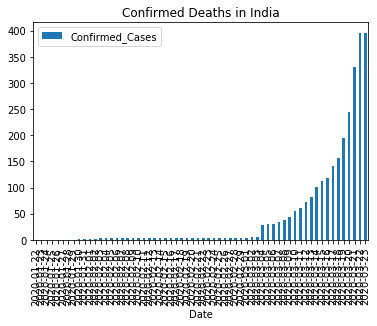

In [25]:
India.plot(x = 'Date', y = 'Confirmed_Cases', kind="bar")
plt.title("Confirmed Deaths in India")
plt.show()

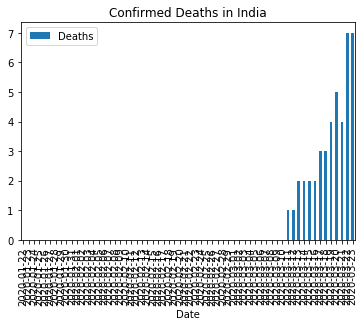

In [26]:
India.plot(x = 'Date', y = 'Deaths', kind="bar")
plt.title("Confirmed Deaths in India")
plt.show()

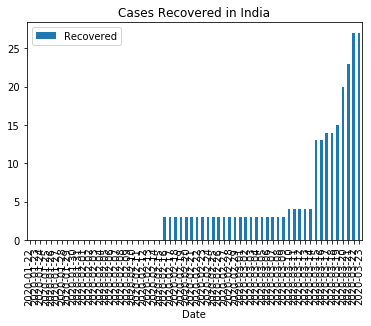

In [27]:
India.plot(x = 'Date', y = 'Recovered', kind="bar")
plt.title("Cases Recovered in India")
plt.show()

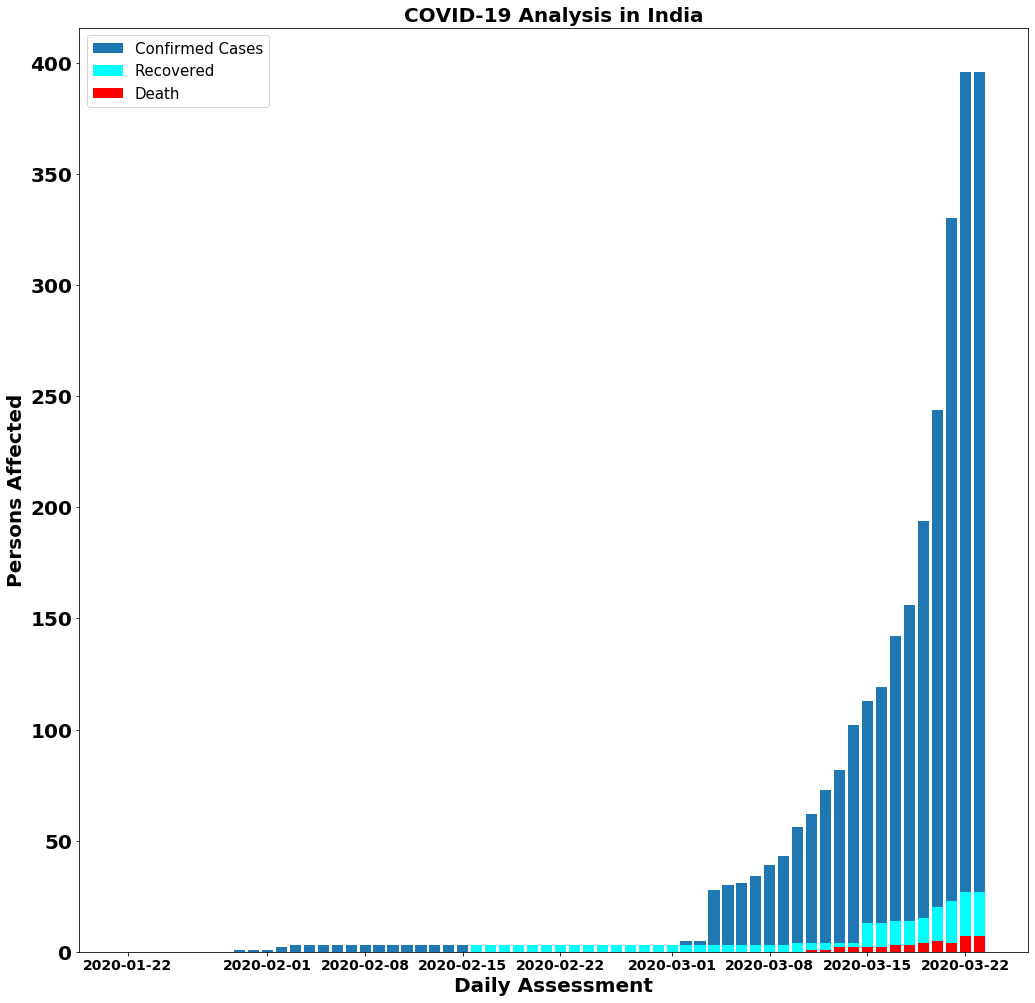

In [36]:
India = final[final['Country']=="India"]
x = India.index.values
fig, ax = plt.subplots(figsize=(17, 17))
plt.bar(x, India['Cases'],label = 'Confirmed Cases')
plt.bar(x, India['Recovered'], color = 'cyan', label ='Recovered')
plt.bar(x, India['Deaths'], color = 'red', label = 'Death')
plt.xlabel('Daily Assessment', fontsize=20, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
# ax.xaxis.set_major_formatter(plt.NullFormatter()) 
plt.ylabel('Persons Affected', fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(fontsize=15)
plt.title("COVID-19 Analysis in India", fontsize = 20, fontweight='bold')
plt.savefig('Analysis Pics/India.png')
plt.show()

#### Data Visualization - USA

In [30]:
USA = Combined_df[Combined_df['Country/Region']=='US']
USA.iloc[-1]

Country/Region             US
Date               2020-03-23
Confirmed_Cases         33276
Deaths                    417
Recovered                 178
Name: 10725, dtype: object

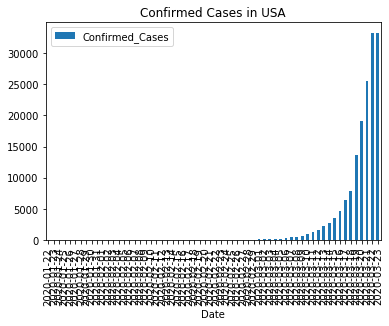

In [31]:
USA.plot(x = 'Date', y = 'Confirmed_Cases', kind="bar")
plt.title("Confirmed Cases in USA")
plt.show()

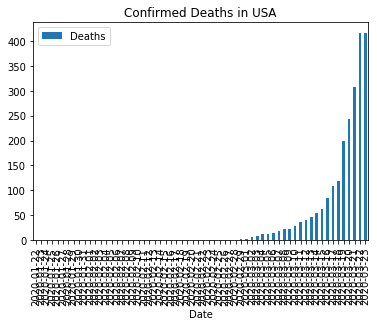

In [32]:
USA.plot(x = 'Date', y = 'Deaths', kind="bar")
plt.title("Confirmed Deaths in USA")
plt.show()

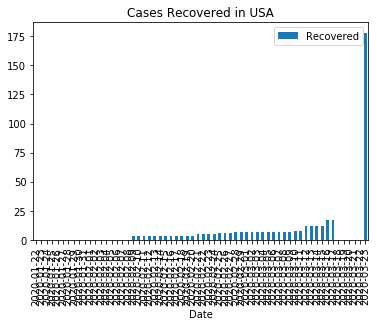

In [33]:
USA.plot(x = 'Date', y = 'Recovered', kind="bar")
plt.title("Cases Recovered in USA")
plt.show()

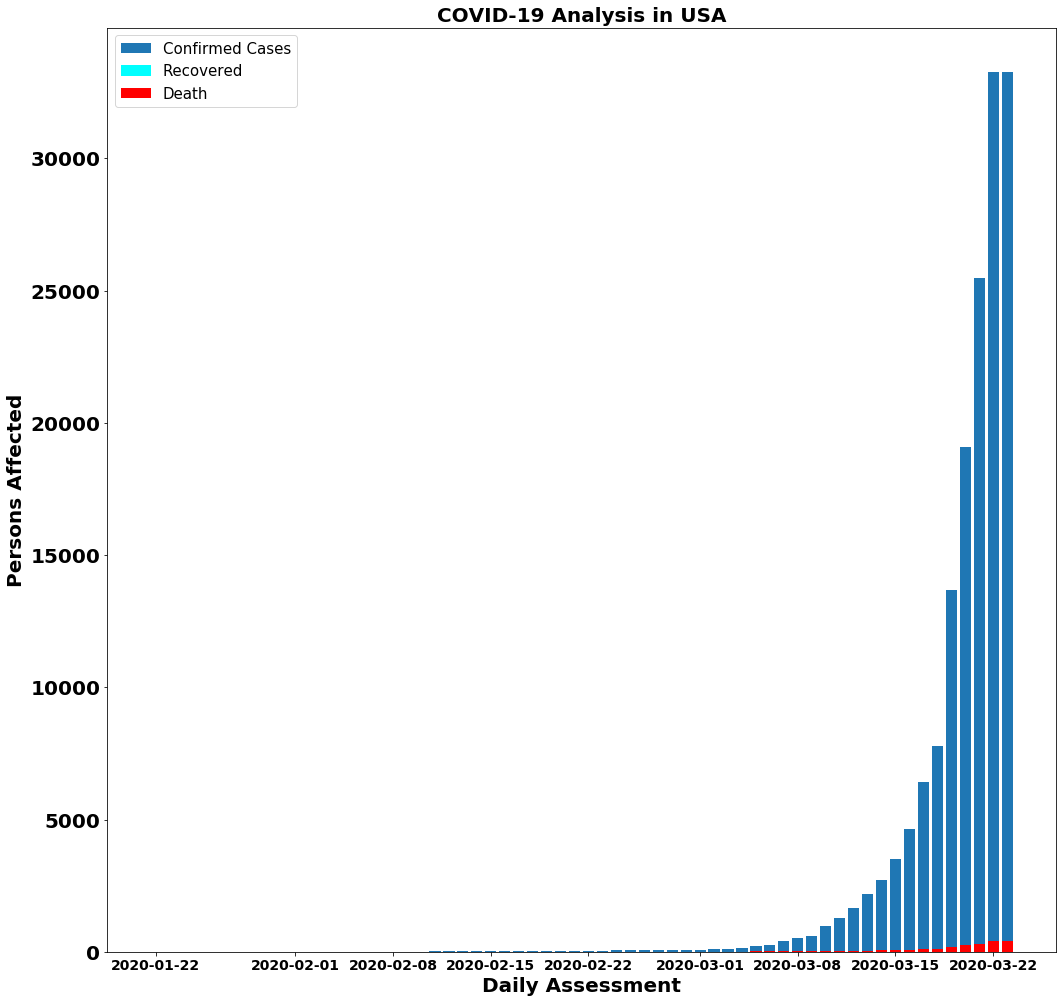

In [37]:
USA = final[final['Country']=="US"]
x = USA.index.values
fig, ax = plt.subplots(figsize=(17, 17))
plt.bar(x, USA['Cases'],label = 'Confirmed Cases')
plt.bar(x, USA['Recovered'], color = 'cyan', label ='Recovered')
plt.bar(x, USA['Deaths'], color = 'red', label = 'Death')
plt.xlabel('Daily Assessment', fontsize=20, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
# ax.xaxis.set_major_formatter(plt.NullFormatter()) 
plt.ylabel('Persons Affected', fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(fontsize=15)
plt.title("COVID-19 Analysis in USA", fontsize = 20, fontweight='bold')
plt.savefig('Analysis Pics/USA.png')
plt.show()

#### Data Visualization - China

In [38]:
China = Combined_df[Combined_df['Country/Region']=='China']
China.iloc[-1]

Country/Region          China
Date               2020-03-23
Confirmed_Cases         81439
Deaths                   3274
Recovered               72814
Name: 2107, dtype: object

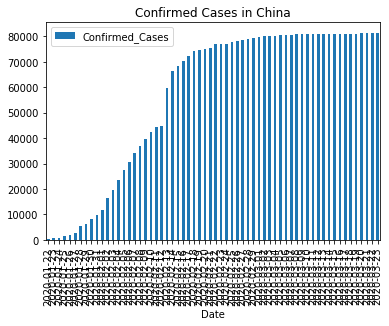

In [39]:
China.plot(x = 'Date', y = 'Confirmed_Cases', kind="bar")
plt.title("Confirmed Cases in China")
plt.show()

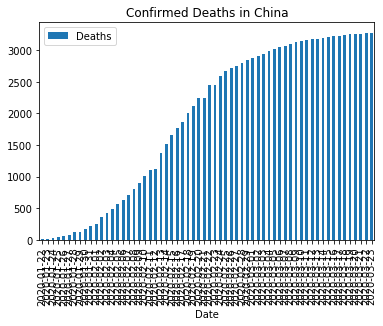

In [40]:
China.plot(x = 'Date', y = 'Deaths', kind="bar")
plt.title("Confirmed Deaths in China")
plt.show()

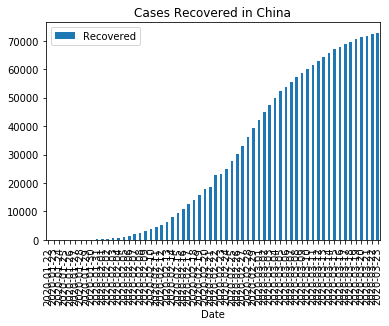

In [41]:
China.plot(x = 'Date', y = 'Recovered', kind="bar")
plt.title("Cases Recovered in China")
plt.show()

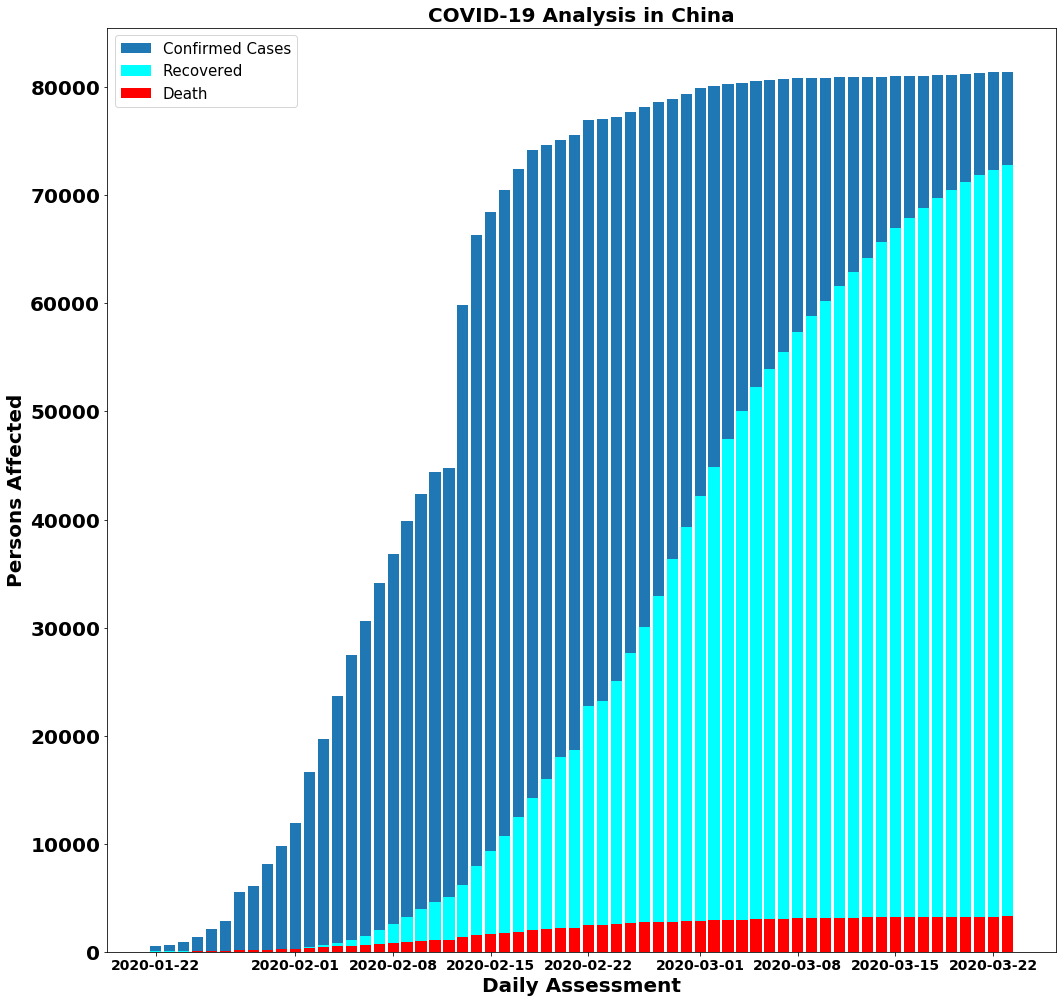

In [42]:
China = final[final['Country']=="China"]
x = China.index.values
fig, ax = plt.subplots(figsize=(17, 17))
plt.bar(x, China['Cases'],label = 'Confirmed Cases')
plt.bar(x, China['Recovered'], color = 'cyan', label ='Recovered')
plt.bar(x, China['Deaths'], color = 'red', label = 'Death')
plt.xlabel('Daily Assessment', fontsize=20, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
# ax.xaxis.set_major_formatter(plt.NullFormatter()) 
plt.ylabel('Persons Affected', fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(fontsize=15)
plt.title("COVID-19 Analysis in China", fontsize = 20, fontweight='bold')
plt.savefig('Analysis Pics/China.png')
plt.show()

#### Data Visualization - Italy

In [43]:
Italy = Combined_df[Combined_df['Country/Region']=='Italy']
Italy.iloc[-1]

Country/Region          Italy
Date               2020-03-23
Confirmed_Cases         59138
Deaths                   5476
Recovered                7024
Name: 5393, dtype: object

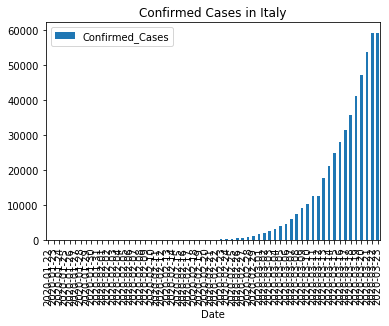

In [44]:
Italy.plot(x = 'Date', y = 'Confirmed_Cases', kind="bar")
plt.title("Confirmed Cases in Italy")
plt.show()

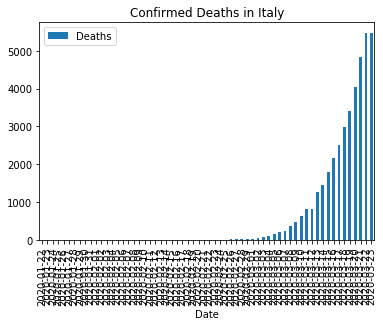

In [45]:
Italy.plot(x = 'Date', y = 'Deaths', kind="bar")
plt.title("Confirmed Deaths in Italy")
plt.show()

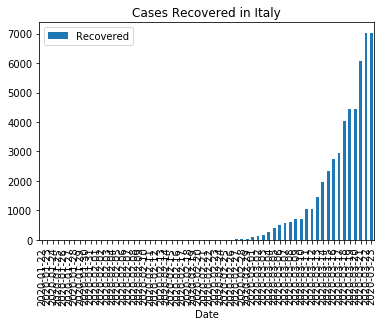

In [46]:
Italy.plot(x = 'Date', y = 'Recovered', kind="bar")
plt.title("Cases Recovered in Italy")
plt.show()

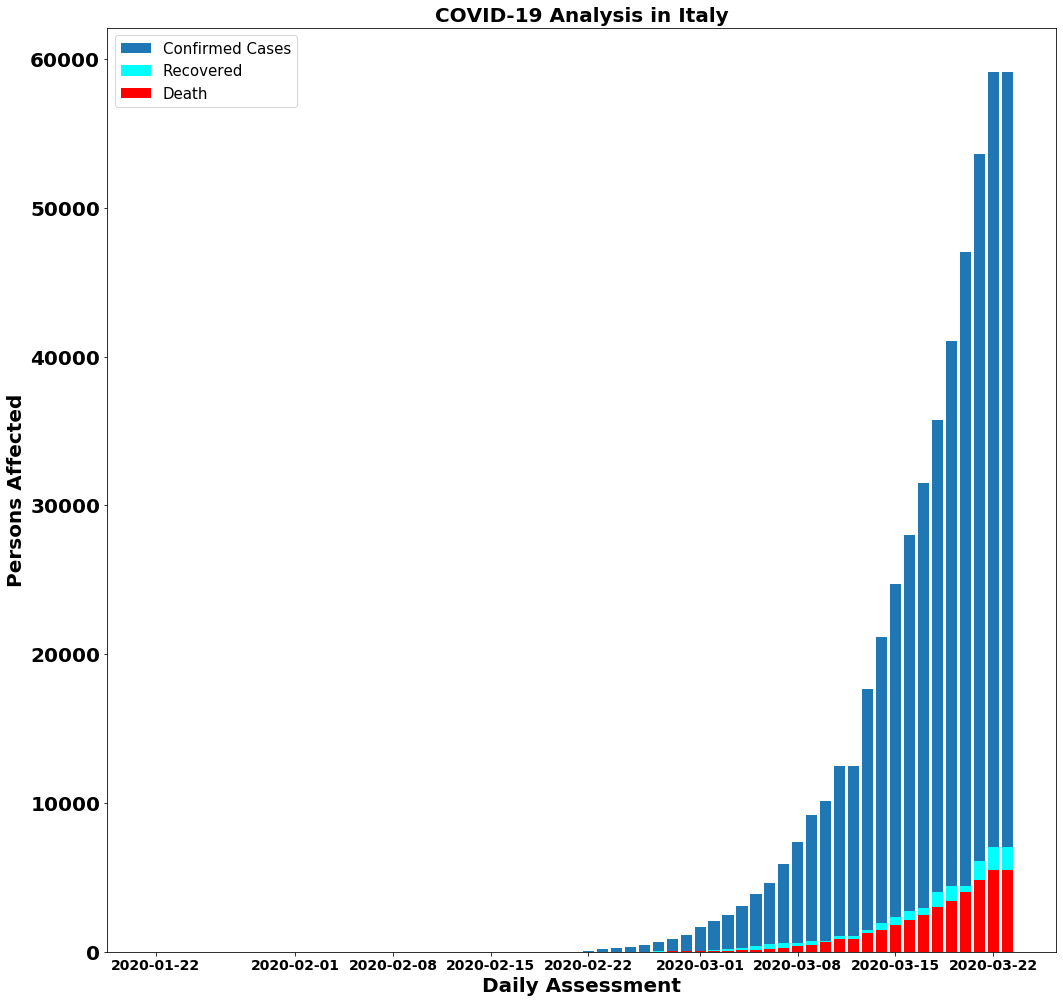

In [48]:
Italy = final[final['Country']=="Italy"]
x = Italy.index.values
fig, ax = plt.subplots(figsize=(17, 17))
plt.bar(x, Italy['Cases'],label = 'Confirmed Cases')
plt.bar(x, Italy['Recovered'], color = 'cyan', label ='Recovered')
plt.bar(x, Italy['Deaths'], color = 'red', label = 'Death')
plt.xlabel('Daily Assessment', fontsize=20, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
# ax.xaxis.set_major_formatter(plt.NullFormatter()) 
plt.ylabel('Persons Affected', fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(fontsize=15)
plt.title("COVID-19 Analysis in Italy", fontsize = 20, fontweight='bold')
plt.savefig('Analysis Pics/Italy.png')
plt.show()

#### Data Visualization - Spain

In [49]:
Spain = Combined_df[Combined_df['Country/Region']=='Spain']
Spain.iloc[-1]

Country/Region          Spain
Date               2020-03-23
Confirmed_Cases         28768
Deaths                   1772
Recovered                2575
Name: 9671, dtype: object

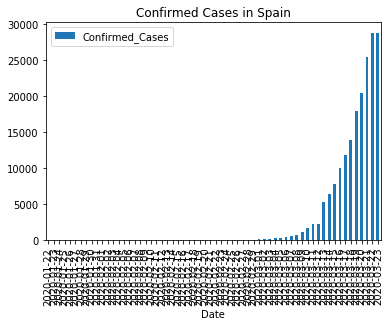

In [50]:
Spain.plot(x = 'Date', y = 'Confirmed_Cases', kind="bar")
plt.title("Confirmed Cases in Spain")
plt.show()

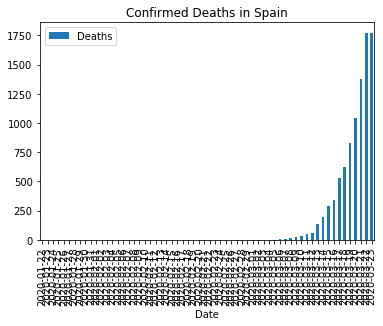

In [51]:
Spain.plot(x = 'Date', y = 'Deaths', kind="bar")
plt.title("Confirmed Deaths in Spain")
plt.show()

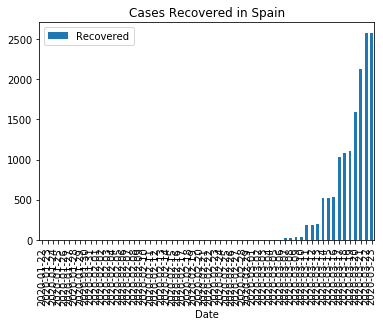

In [52]:
Spain.plot(x = 'Date', y = 'Recovered', kind="bar")
plt.title("Cases Recovered in Spain")
plt.show()

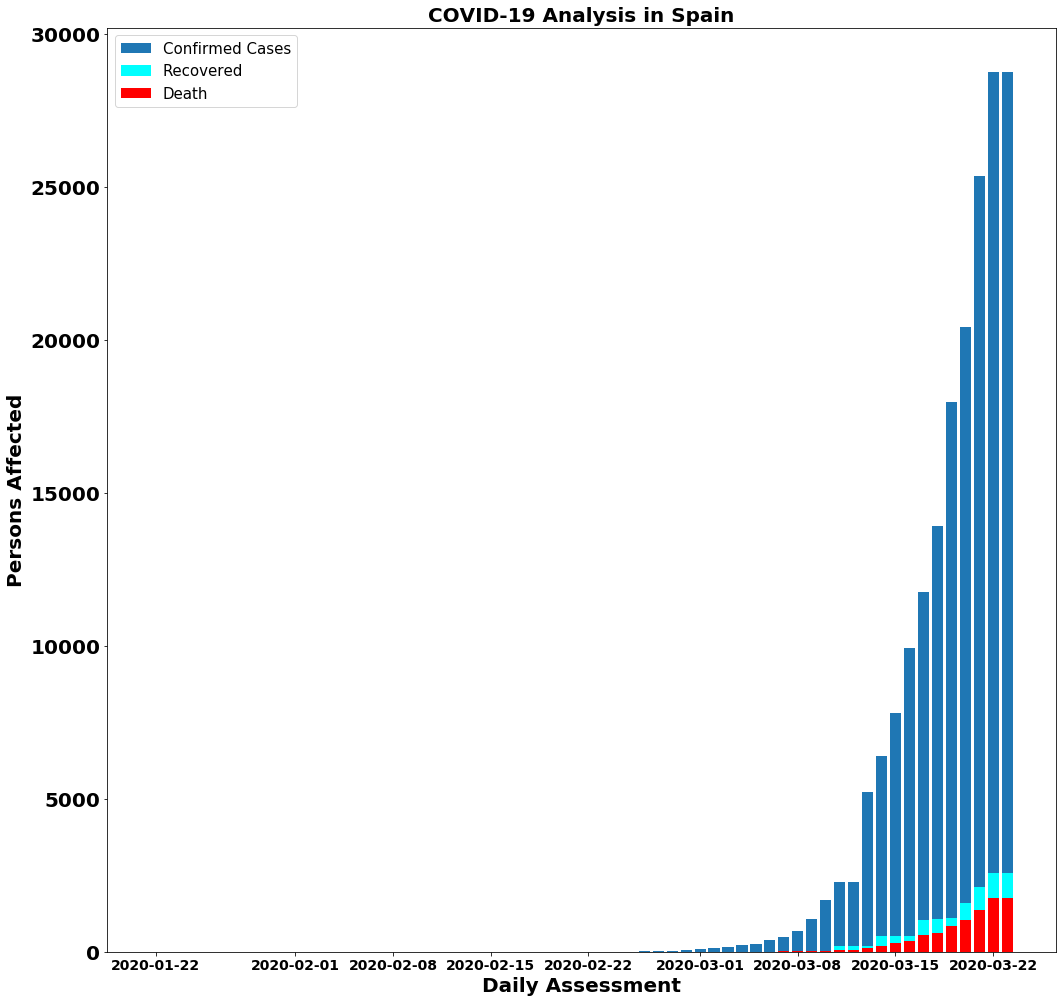

In [53]:
Spain = final[final['Country']=="Spain"]
x = Spain.index.values
fig, ax = plt.subplots(figsize=(17, 17))
plt.bar(x, Spain['Cases'],label = 'Confirmed Cases')
plt.bar(x, Spain['Recovered'], color = 'cyan', label ='Recovered')
plt.bar(x, Spain['Deaths'], color = 'red', label = 'Death')
plt.xlabel('Daily Assessment', fontsize=20, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
# ax.xaxis.set_major_formatter(plt.NullFormatter()) 
plt.ylabel('Persons Affected', fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(fontsize=15)
plt.title("COVID-19 Analysis in Spain", fontsize = 20, fontweight='bold')
plt.savefig('Analysis Pics/Spain.png')
plt.show()

#### Data Visualization - Germany

In [48]:
Germany = Combined_df[Combined_df['Country/Region']=='Germany']
Germany.iloc[-1]

Country/Region        Germany
Date               2020-03-23
Confirmed_Cases         24873
Deaths                     94
Recovered                 266
Name: 4029, dtype: object

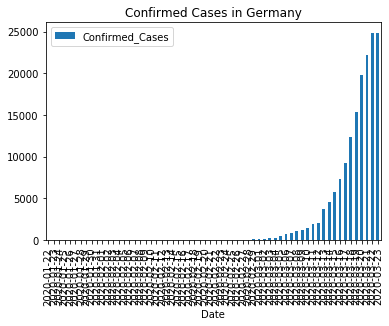

In [49]:
Germany.plot(x = 'Date', y = 'Confirmed_Cases', kind="bar")
plt.title("Confirmed Cases in Germany")
plt.show()

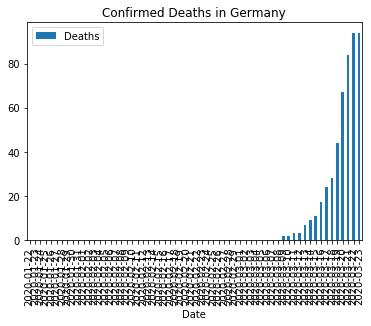

In [50]:
Germany.plot(x = 'Date', y = 'Deaths', kind="bar")
plt.title("Confirmed Deaths in Germany")
plt.show()

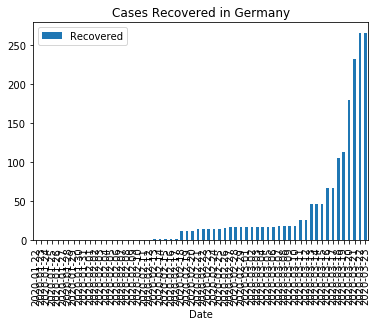

In [51]:
Germany.plot(x = 'Date', y = 'Recovered', kind="bar")
plt.title("Cases Recovered in Germany")
plt.show()

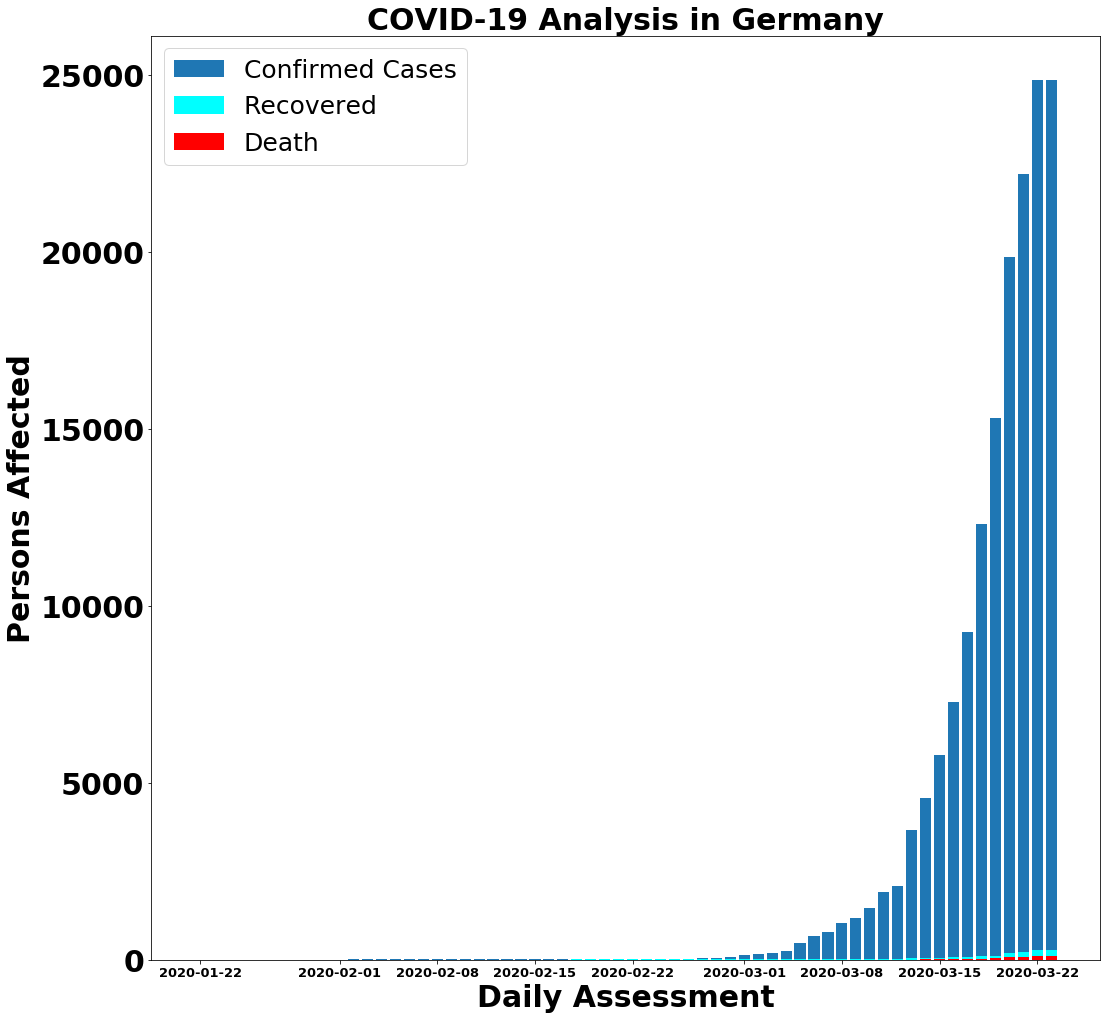

In [63]:
Germany = final[final['Country']=="Germany"]
x = Germany.index.values
fig, ax = plt.subplots(figsize=(17, 17))
plt.bar(x, Germany['Cases'],label = 'Confirmed Cases')
plt.bar(x, Germany['Recovered'], color = 'cyan', label ='Recovered')
plt.bar(x, Germany['Deaths'], color = 'red', label = 'Death')
plt.xlabel('Daily Assessment', fontsize=30, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
# ax.xaxis.set_major_formatter(plt.NullFormatter()) 
plt.ylabel('Persons Affected', fontsize=30, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')
plt.legend(fontsize=25)
plt.title("COVID-19 Analysis in Germany", fontsize = 30, fontweight='bold')
plt.savefig('Analysis Pics/Germany.png')
plt.show()

c:\users\ranjeet walia\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


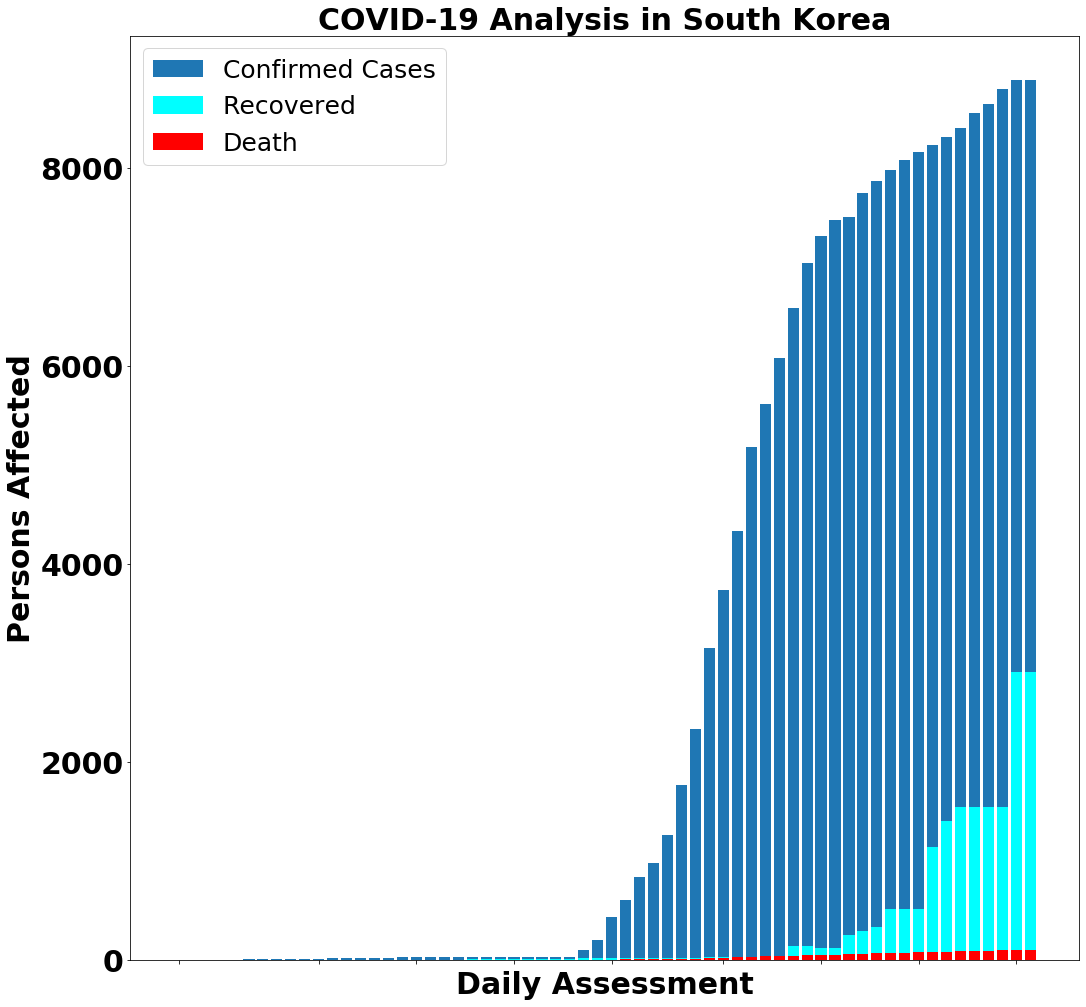

In [4]:
Korea = final[final['Country']=="Korea, South"]
x = Korea.index.values
fig, ax = plt.subplots(figsize=(17, 17))
plt.bar(x, Korea['Cases'],label = 'Confirmed Cases')
plt.bar(x, Korea['Recovered'], color = 'cyan', label ='Recovered')
plt.bar(x, Korea['Deaths'], color = 'red', label = 'Death')
plt.xlabel('Daily Assessment', fontsize=30, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
ax.xaxis.set_major_formatter(plt.NullFormatter()) 
plt.ylabel('Persons Affected', fontsize=30, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')
plt.legend(fontsize=25)
plt.title("COVID-19 Analysis in South Korea", fontsize = 30, fontweight='bold')
plt.savefig('Analysis Pics/South Korea.png')
plt.show()

#### Data Visualization - Entire World

In [53]:
World = Combined_df[['Date','Confirmed_Cases','Deaths','Recovered']]
World = World.groupby('Date').sum()
World = World.reset_index(level=['Date'])
World

,Date,Confirmed_Cases,Deaths,Recovered
0,2020-01-22,555.0,17.0,28.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,1434.0,42.0,39.0
4,2020-01-26,2118.0,56.0,52.0
5,2020-01-27,2927.0,82.0,61.0
6,2020-01-28,5578.0,131.0,107.0
7,2020-01-29,6166.0,133.0,126.0
8,2020-01-30,8234.0,171.0,143.0
9,2020-01-31,9927.0,213.0,222.0


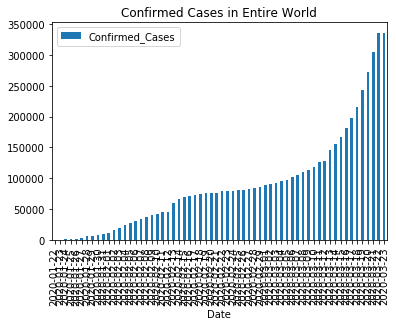

In [54]:
World.plot(x = 'Date', y = 'Confirmed_Cases', kind="bar")
plt.title("Confirmed Cases in Entire World")
plt.show()

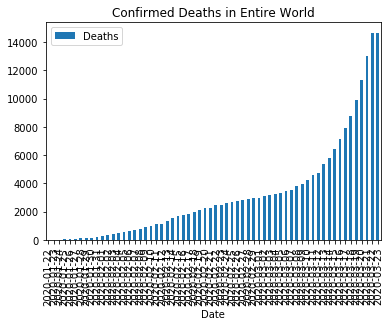

In [55]:
World.plot(x = 'Date', y = 'Deaths', kind="bar")
plt.title("Confirmed Deaths in Entire World")
plt.show()

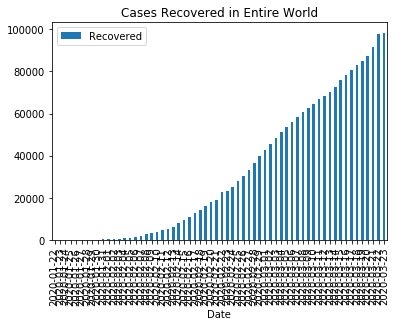

In [56]:
World.plot(x = 'Date', y = 'Recovered', kind="bar")
plt.title("Cases Recovered in Entire World")
plt.show()

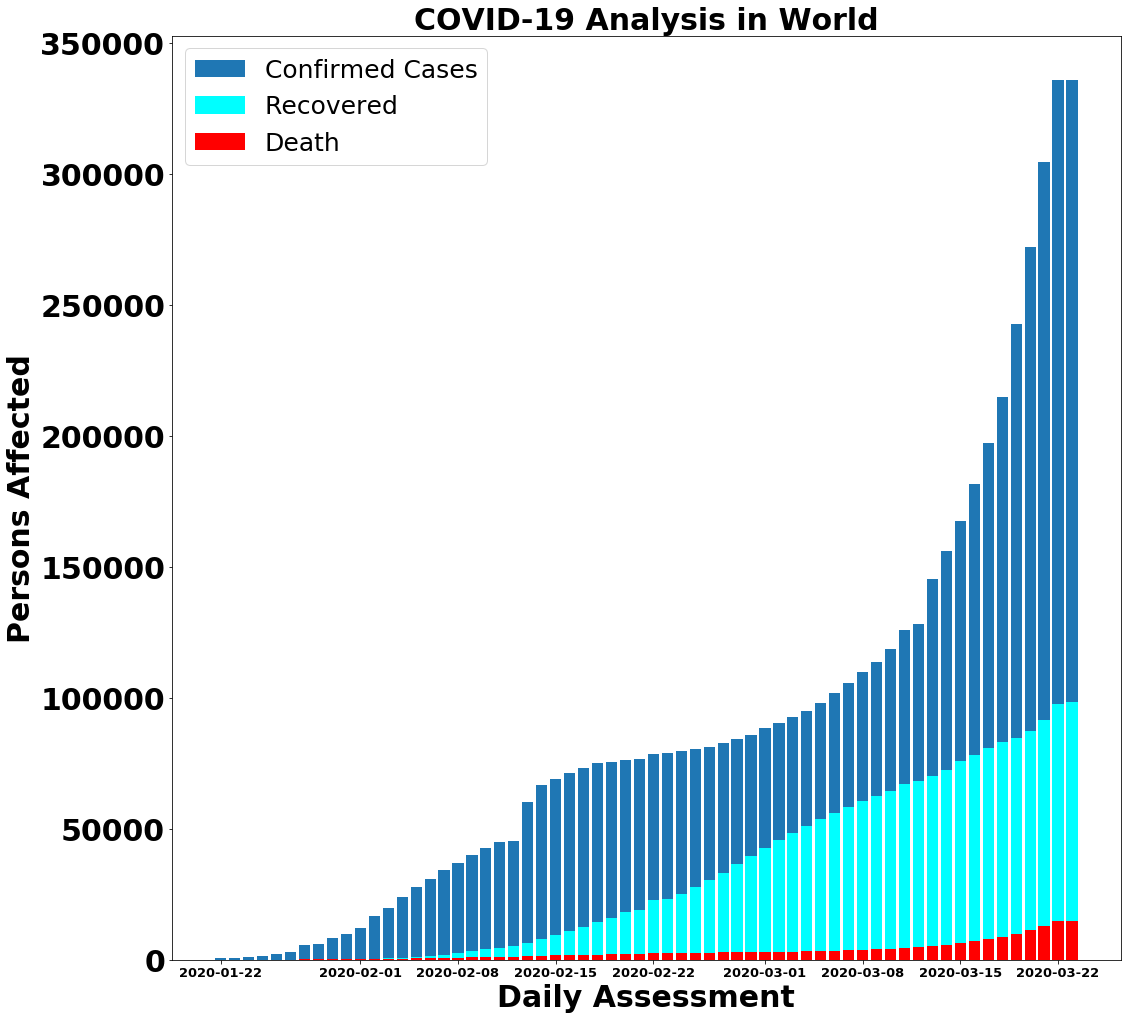

In [64]:
World = final.groupby(['Date']).sum()
x = World.index.values
fig, ax = plt.subplots(figsize=(17, 17))
plt.bar(x, World['Cases'],label = 'Confirmed Cases')
plt.bar(x, World['Recovered'], color = 'cyan', label ='Recovered')
plt.bar(x, World['Deaths'], color = 'red', label = 'Death')
plt.xlabel('Daily Assessment', fontsize=30, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
# ax.xaxis.set_major_formatter(plt.NullFormatter()) 
plt.ylabel('Persons Affected', fontsize=30, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')
plt.legend(fontsize=25)
plt.title("COVID-19 Analysis in World", fontsize = 30, fontweight='bold')
plt.savefig('Analysis Pics/World.png')
plt.show()

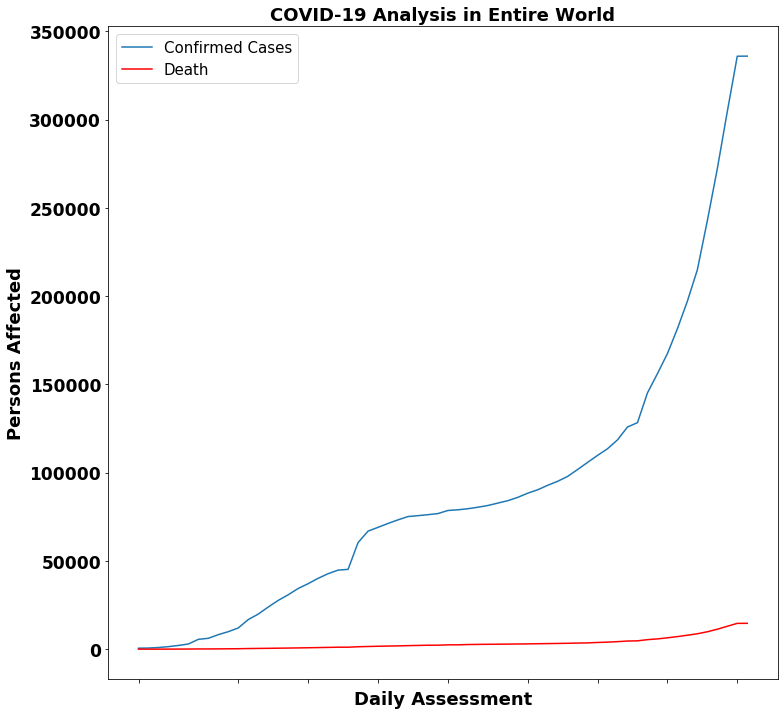

In [60]:
World = final.groupby(['Date']).sum()
x = World.index.values
fig, ax = plt.subplots(figsize=(12, 12))
plt.plot(x, World['Cases'],label = 'Confirmed Cases')
# plt.plot(x, World['Recovered'], color = 'cyan', label ='Recovered')
plt.plot(x, World['Deaths'], color = 'red', label = 'Death')
plt.xlabel('Daily Assessment', fontweight='bold', fontsize=18)
plt.xticks(fontweight='bold', fontsize = 10)
ax.xaxis.set_major_formatter(plt.NullFormatter()) 
plt.ylabel('Persons Affected', fontweight='bold', fontsize=18)
plt.yticks(fontweight='bold', fontsize = 17)
plt.legend(fontsize=15)
plt.title("COVID-19 Analysis in Entire World", fontsize = 18, fontweight='bold')
plt.savefig('Analysis Pics/World.png')
plt.show()

In [12]:
test = pd.read_csv("Test-Done.csv")
test = pd.DataFrame(test)
test

,Country,Total tests
0,China,320000
1,Germany,167000
2,Italy,206886
3,USA,37646
4,Spain,30000
5,India,14514
6,South Korea,316664
7,Iran,80000


In [18]:
test = test.astype({'Total tests':float}) 
test = test.sort_values(by='Total tests', ascending=True)

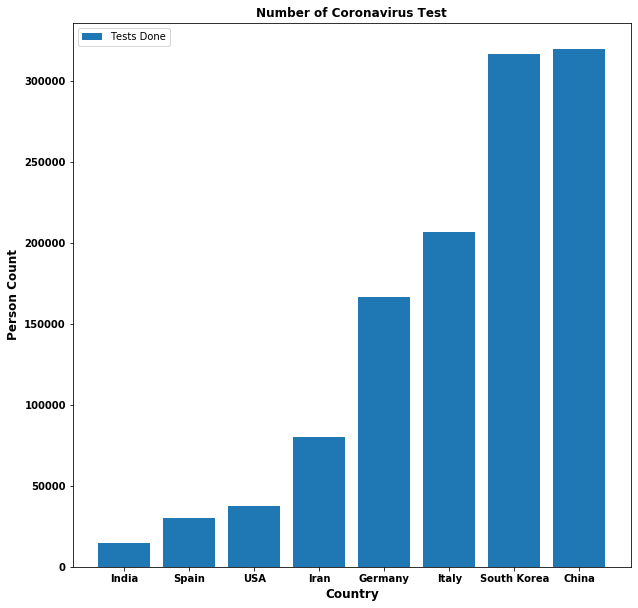

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(test.Country, test['Total tests'], label='Tests Done')
plt.title("Number of Coronavirus Test", fontsize = 12, fontweight='bold')
plt.xlabel('Country', fontweight='bold', fontsize=12)
plt.xticks(fontweight='bold')
plt.ylabel('Person Count', fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold')
plt.legend(loc=2)
plt.savefig('Analysis Pics/Test.png')
plt.show()